<a href="https://colab.research.google.com/github/Ajiboyefemifaith/TELCO/blob/main/TELCO_CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING DATA

Importing libraries for analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing data for analysis

In [ ]:
data=pd.read_csv('Telco-Customer-Churn.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# CLEANING DATA

To view the dataframe

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Checking data type



In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Converting 'TotalCharges' from object to float 

In [ ]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')

Checking dimensions

In [ ]:
data.shape

(7043, 21)

Checking features

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Checking information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking summary statsistics

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


To check for null values

In [ ]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

To drop columns with missing values since the value obtained is almost insignificant to the total length of the dataframe

In [ ]:
data=data.dropna(axis=0,how='any')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EXPLORATORY DATA ANALYSIS

# Target variable

The dataset has been categorized into 3 major heads and this heads contains information about Demography of the customers, account infomation and the services that each customer has signed up for. The column churn represent the customers who has left the company within the last month. The "Churn" column is our target.

Let's visualize how frequently customers has left the company.

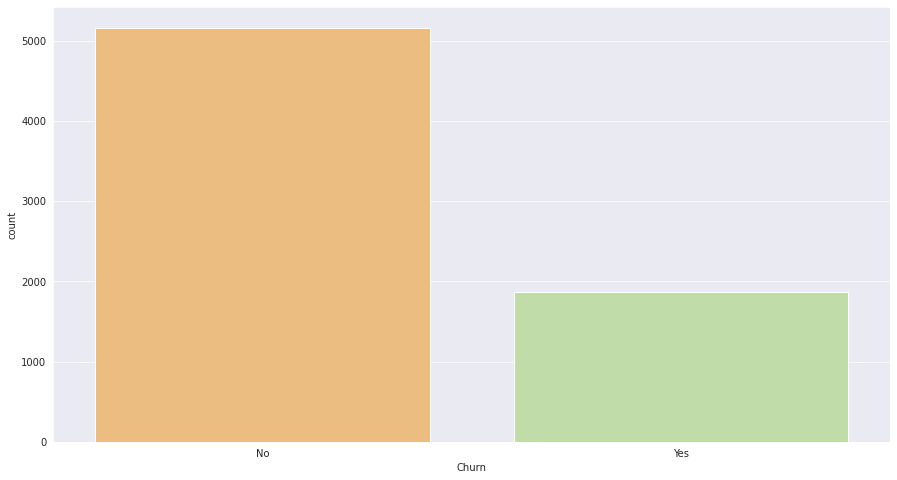

In [ ]:
sns.countplot(x='Churn',data=data, palette='Spectral')
plt.rcParams['figure.figsize']=15,8
sns.set_style('darkgrid' )

This chart shows us the number of customers (male and female) that has left the company(Yes) and those that are still with the company(No). The number of those that has left the company is relatively small compared to those that are still with the company.

# Predictor variables

These variables would help us investigate why customers are leaving the company.

Senior citizen

These are citizens that are 65 years and above. let's determine if being a senior citizen has anything to do with why customers are leaving the company.

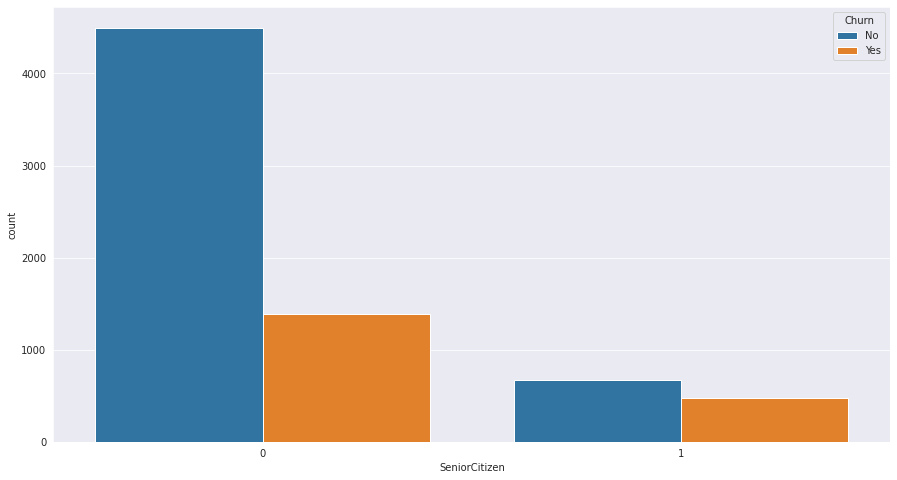

In [ ]:
sns.countplot(x='SeniorCitizen',data=data,hue='Churn')

From the chart we can deduce that the total number of senior citizen(1) is small compared to the whole population of Telco's customers and also the proportion of the churned senior citizen is small compared to the total churned customers. This doesnt explain why customers are leaving the company

Gender


Does the gender of customers have anything to do with churning?

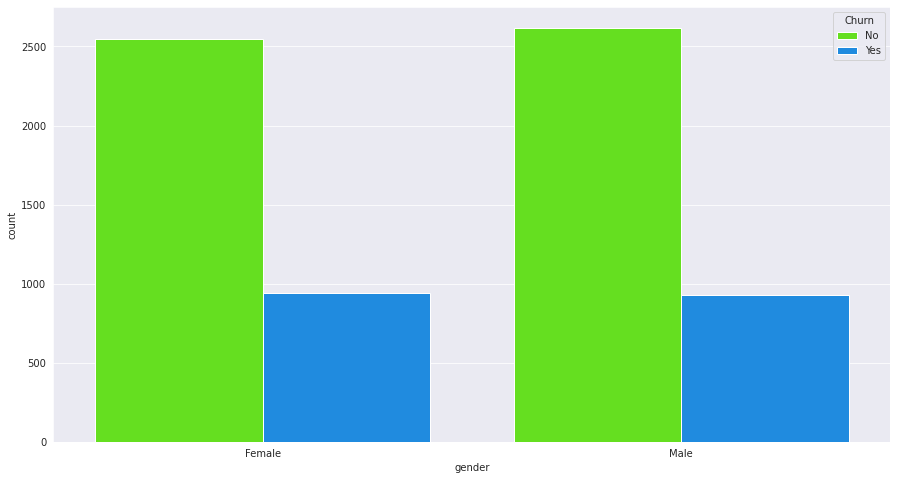

In [ ]:
sns.countplot(x='gender',data=data, hue='Churn',palette="gist_rainbow")

Telco has almost the same proportion of both genders.The number of churned customers both male and female is almost the same. This doesnt explain why customers are leaving.

Partner


This represent the population of Telco"s customers that are married or have a partner. Does this have anything to do with why they left the company?

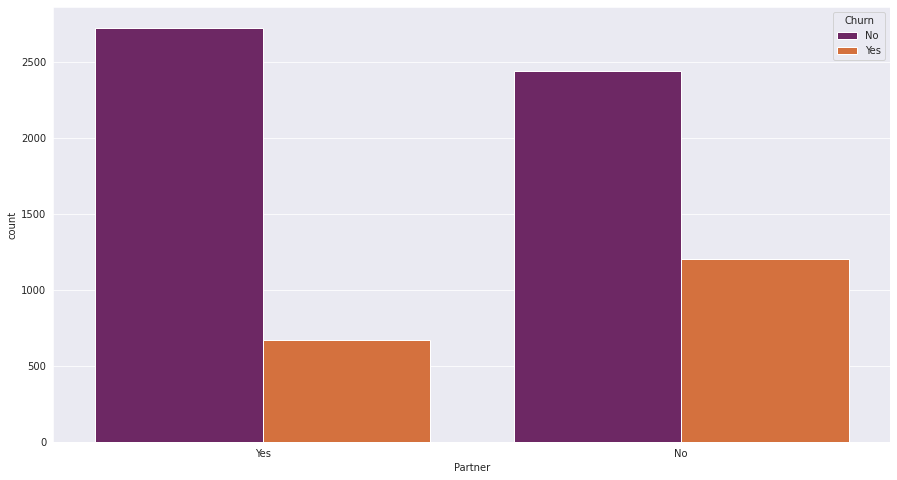

In [ ]:
sns.countplot(x='Partner',data=data, hue="Churn", palette='inferno' )

Majority of Telco's customers have a partner. We can see from our visualization that people without partners are more like to leave the company.

Dependents

This column tells us whether customers have anybody relying on them for financial support. 

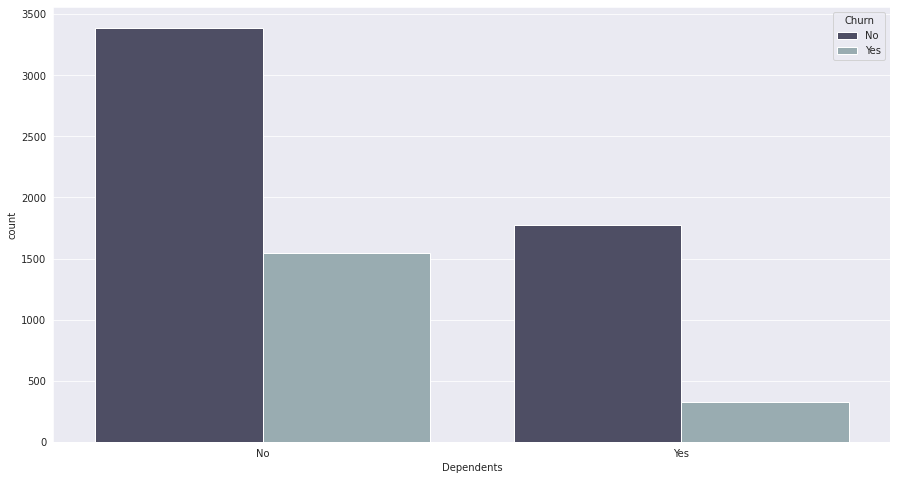

In [ ]:
sns.countplot(x="Dependents", data=data, hue='Churn', palette='bone' )

A small proportion of those who have dependents on them have left the company. Telco has a large number of customers who do not have dependents.Quite a number of these people have churned.This doesnt tell us why customers are leaving.

Tenure

This represent the number of months that a customer has spent with the company. This column consist of numerical variables. Let's visualize the distribution

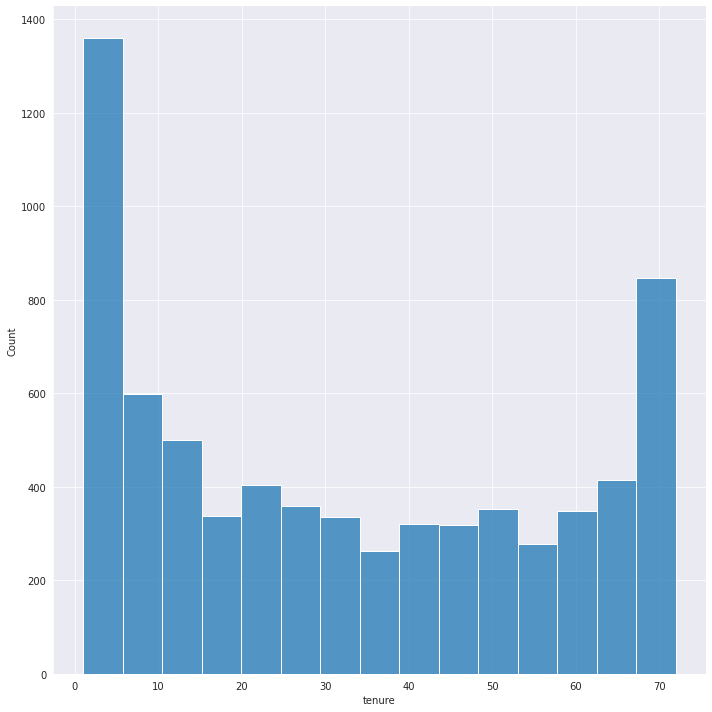

In [ ]:
sns.displot(x='tenure', data=data, height=10, aspect=1)

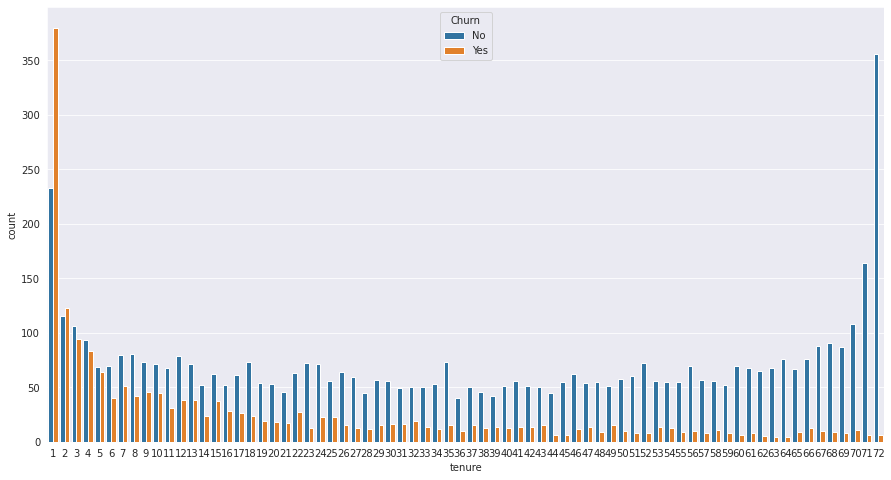

In [ ]:
sns.countplot(data=data,x="tenure",hue='Churn')

We can see from the chart that the number of customers that churned after their first subscription is higher than those who stayed back. This can be observed in the second month as well. Customers that have spent only a few months with the company will likely churn.The rate at which new customers churn is very high. Customers that have spent a lot of time with the company are less likely to churn while recent customers would most likely churn.

Phone service


This represents whether the customers make use of a phone service or not.

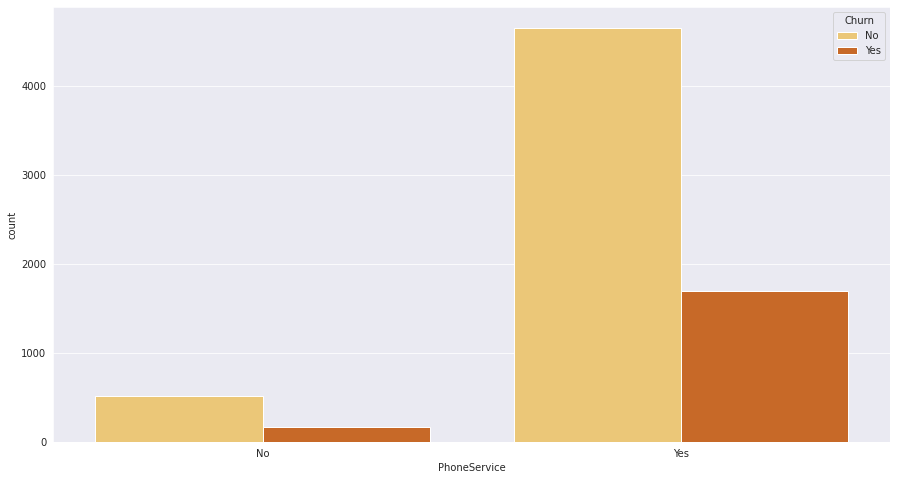

In [ ]:
sns.countplot(x="PhoneService",data=data, hue='Churn', palette='YlOrBr')

A high proportion of the customer population use the phone service. This doesnt really tell us if there is a relationship between phone service and churn.

Multiple lines

 This column represent whether customers use multiple lines or use no phone service. Could this be the reaseon why customers churn?

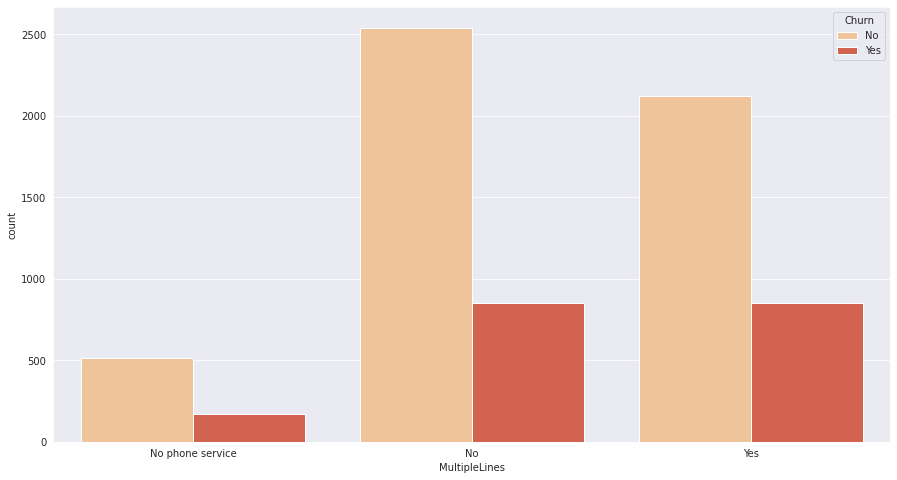

In [ ]:
sns.countplot(x='MultipleLines',data=data, hue='Churn', palette='OrRd')

A very small proportion of the customer population do use use phone service at all.This doesn't really explain why customers are leaving the company since customers that have multiple lines and those that do not have will likely churn at the same rate. Customers might actually be leaving the company because they have to pay a high rate for using multiple lines. let's see if monthly charges contributes to churning of those using multiple lines.

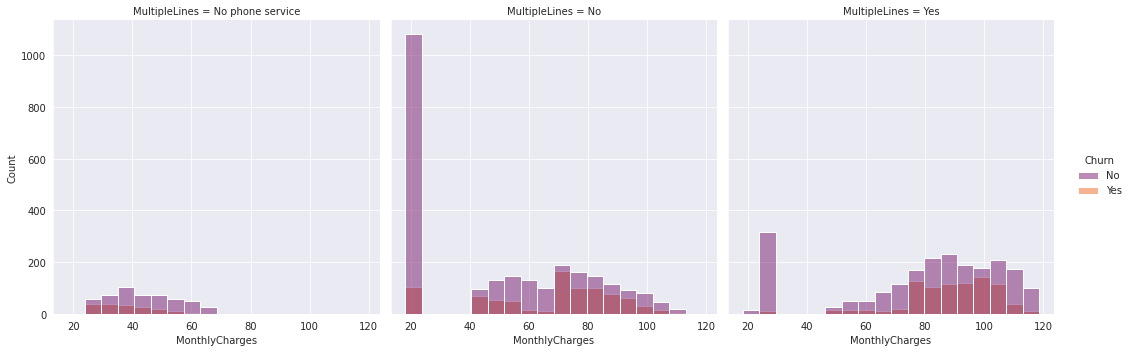

In [ ]:
sns.displot(data=data, x='MonthlyCharges',hue='Churn',col='MultipleLines', palette='inferno')

Customers with multiples lines tend to pay more monthly charges than those who do not have and those who doesnt use phone service.

Internet service

This represents the internet service that each customer use which could be Fibre optic, DSL or none . Let's visualize if there is a relationship between this and churn.

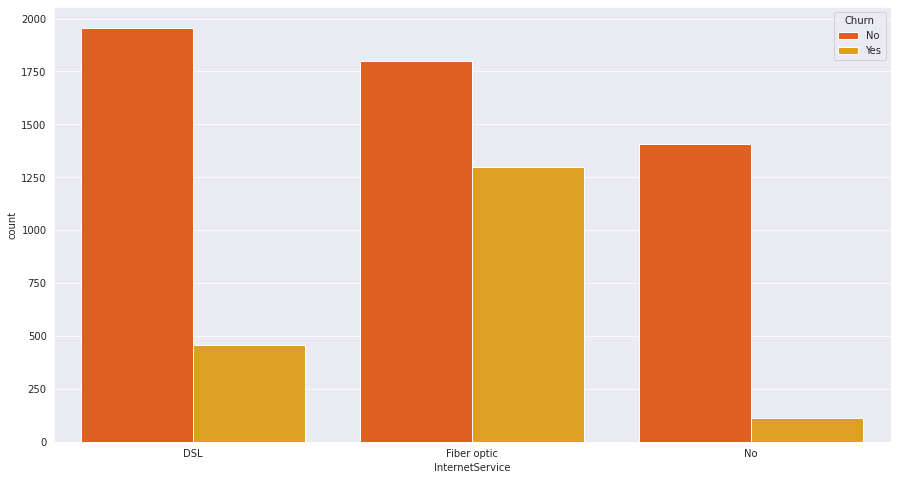

In [ ]:
sns.countplot(data=data, x='InternetService', hue='Churn', palette='autumn')

The rate at which customers using Fibre optic churn is high. This could as a result of poor service, internet connection, price or general dissatisfaction with the the service this package offers. let's further investigate to check if the cost of the monthly charges of the internet service is responsible for churn.

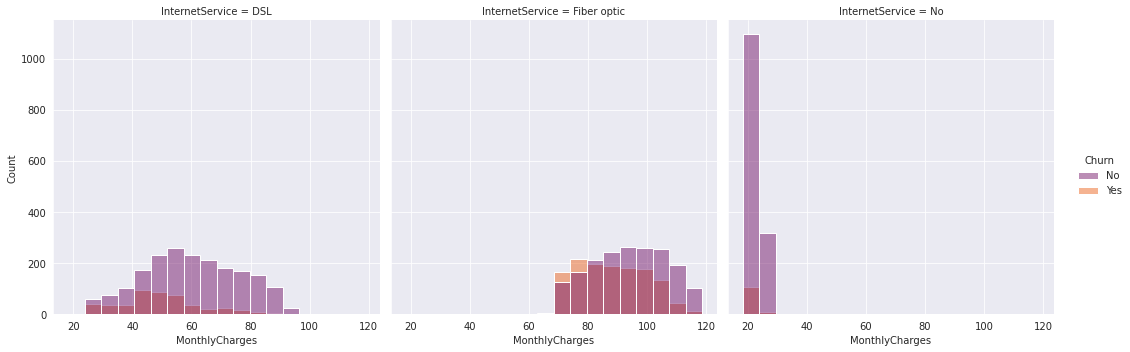

In [ ]:
sns.displot(data=data, x='MonthlyCharges',hue='Churn',col='InternetService', palette='inferno')


The monthly charges that customers using Fibre optic pay is very high  compared to DSL and of course customers who do not use the internet service at all. This could be why customers are leaving amongst several other reasons.

Online security

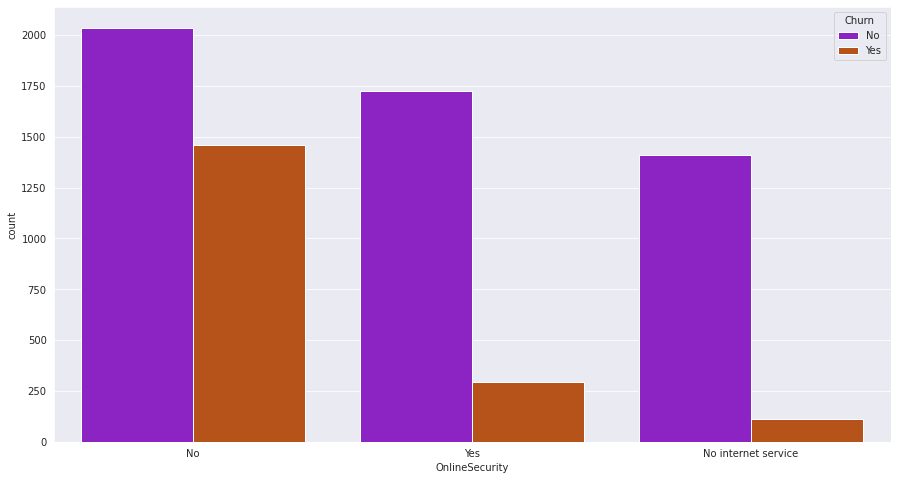

In [ ]:
sns.countplot(data=data, x='OnlineSecurity',hue='Churn',palette='gnuplot')

There is a relationship betweeen churn and online security. Customers that do not use online security will most likely churn.  

Online Backup

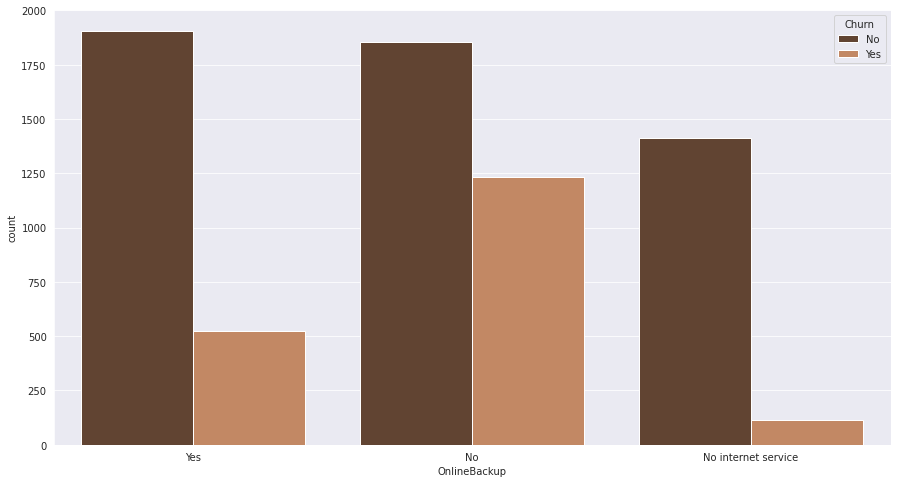

In [ ]:
sns.countplot(x='OnlineBackup',data=data, hue='Churn', palette='copper')

There is almost the same number of customers that use online backup as those who do not use. Customers who do not use online backup would most likely churn.

Device Protection

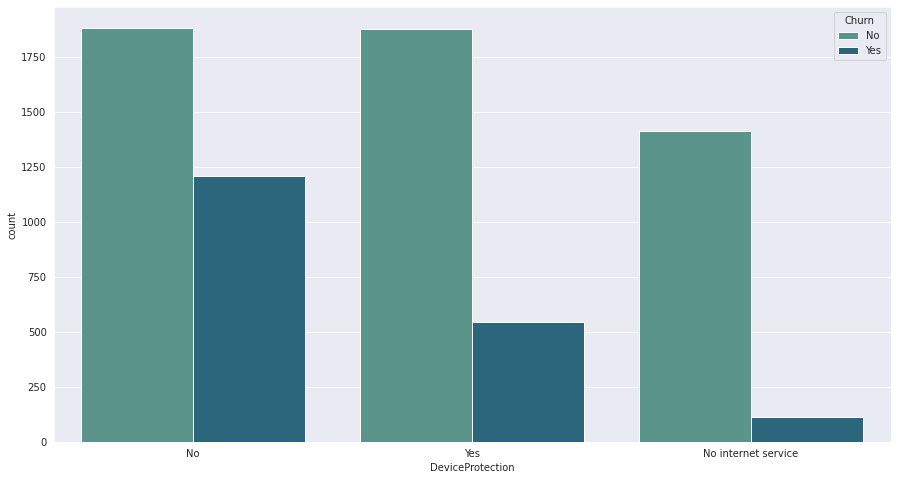

In [ ]:
sns.countplot(x='DeviceProtection',data=data, hue='Churn', palette='crest')

The proportion of Customers that use device protection and those who do not are relatively the same. There is a high chance that customers who do not use device protection would churn compared to those who do.

Tech support

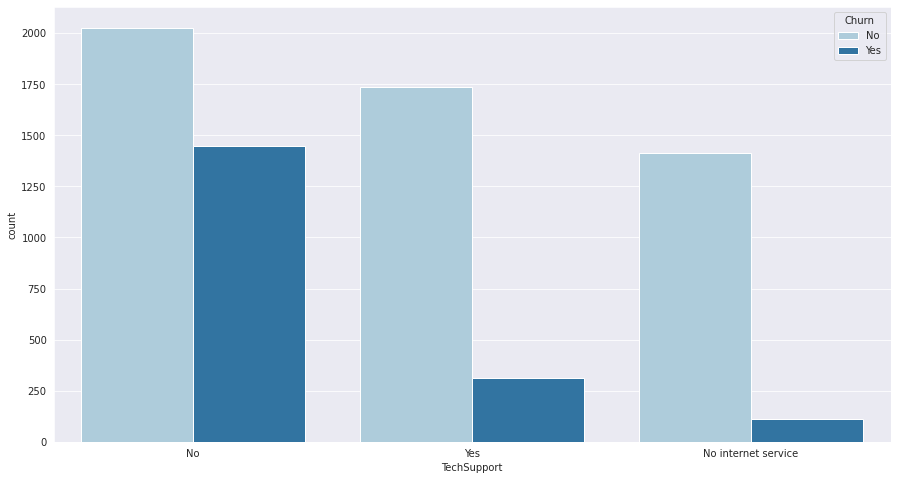

In [ ]:
sns.countplot(x='TechSupport',data=data, hue='Churn', palette='Paired')

There is a large number of Customers that do not use Tech support. A very large number of customers who do not use tech support churned. There is a high chance that customers who do not use Tech support would churn compared to those who do.

Streaming TV

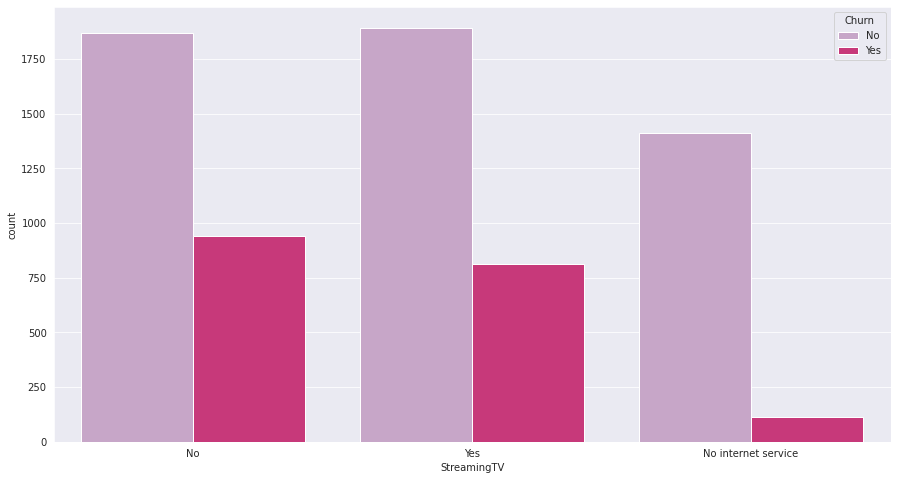

In [ ]:
sns.countplot(x='StreamingTV',data=data, hue='Churn', palette='PuRd')

Customers who stream tv and those who do not would likely churn the same.

Streaming Movies

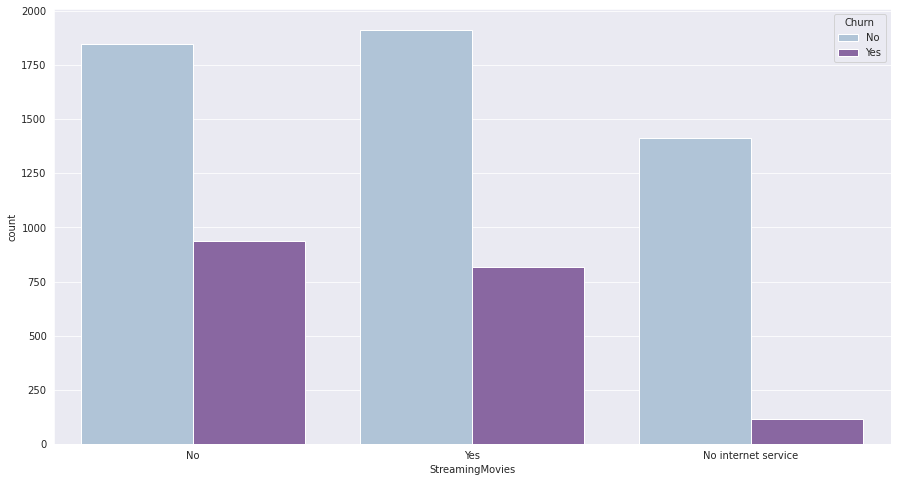

In [ ]:
sns.countplot(x='StreamingMovies',data=data, hue='Churn', palette='BuPu')

Customers who stream movies and those who do not would like churn the same.

Contract

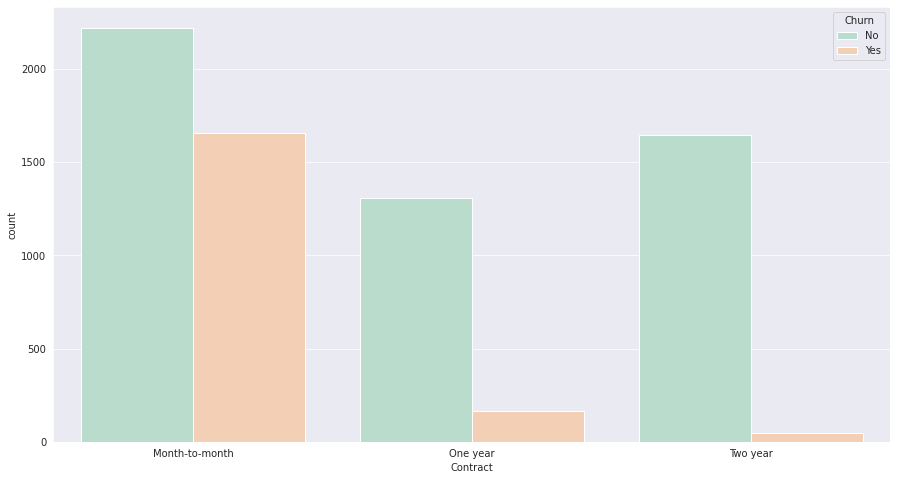

In [ ]:
sns.countplot(x='Contract',data=data, hue='Churn', palette='Pastel2')

From our chart, we can see that most customers prefer to use the month to month service, this could be because most of the customers are new and the company has not earned their loyalty yet. Customers who  subscribes monthly tend to churn the most. The longer a customer's contract is with the company the less likely they are to churn.

PaperlessBilling

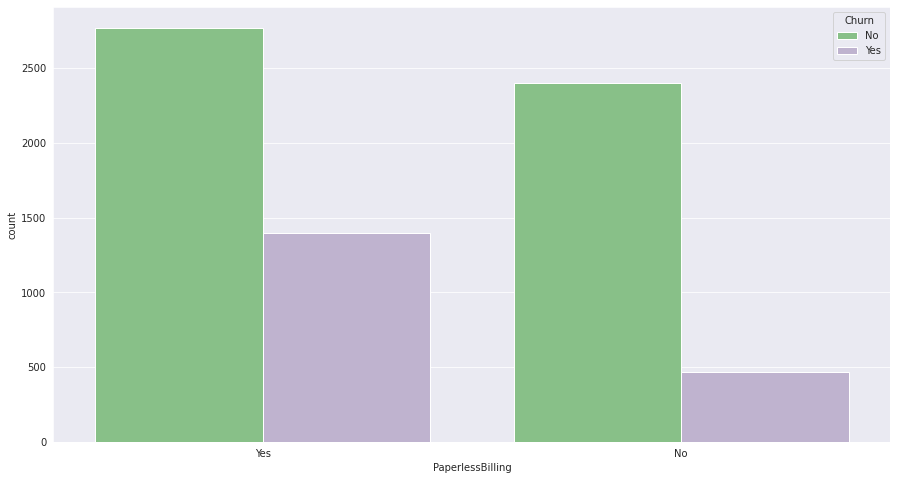

In [ ]:
sns.countplot(x='PaperlessBilling',data=data, hue='Churn', palette='Accent')

There is a higher number of customers who use paperless billings to those who do not.

Payment Method

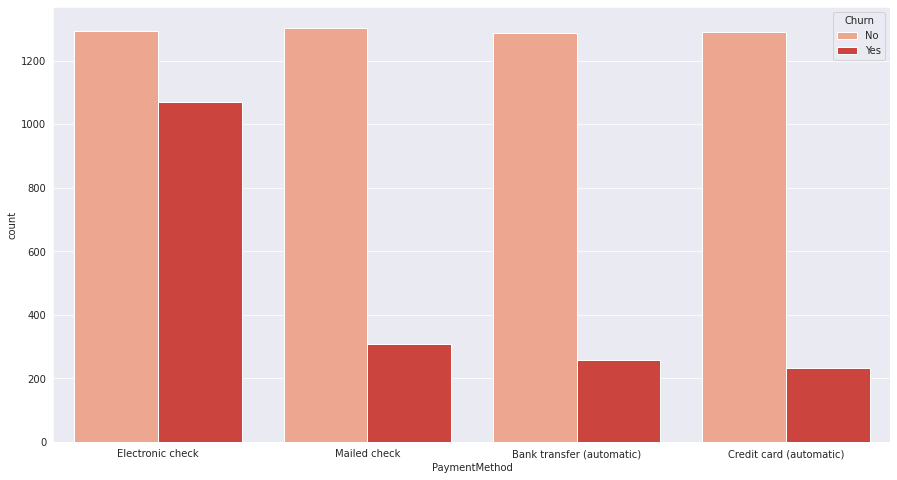

In [ ]:
sns.countplot(x='PaymentMethod',data=data, hue='Churn', palette='Reds')

The number of customers using the 4 methods of payment is equally distributed. Customers using the electronic check methood churned the most.

Monthly Charges

This is a numerical variable that tells the amount customers pay in a month for the services they are offered. Could this be why customers are leaving the company?

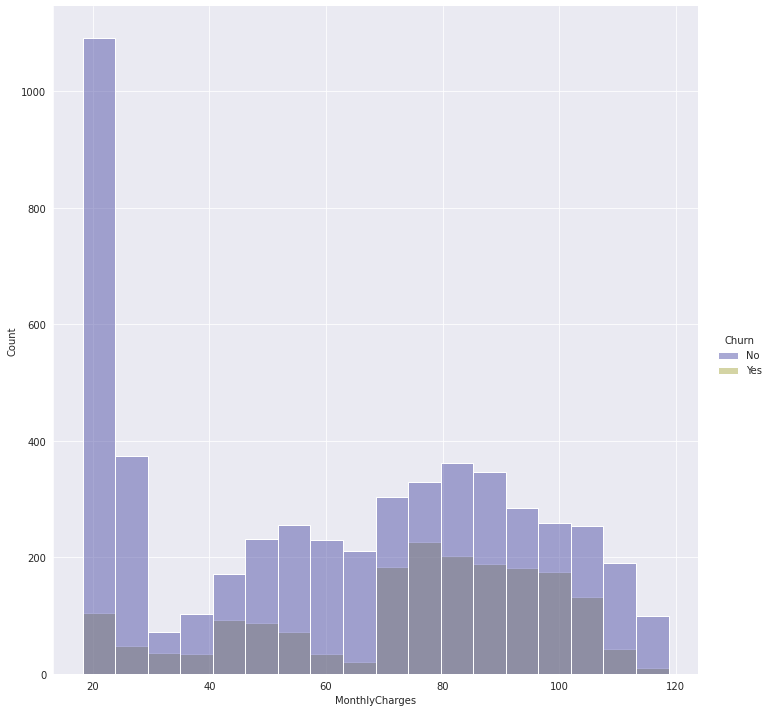

In [ ]:
sns.displot(x='MonthlyCharges',data=data, hue='Churn', palette='gist_stern',aspect=1, height=10 )

From the chart, there is a very high number of customers that pay between 20 to 35 (units were not stated) and they are less likely to churn. This could be due to the fact that they get satisfaction from the package they subscribe for. Customers who pay high monthly charges are more likely to churn the most. This could be as a result of paying such high charges for packages without being satisfied.

Total Charges

This is a numerical variable that tells the total amount customers pay  for the services they are offered. The unit for this variable was not stated.

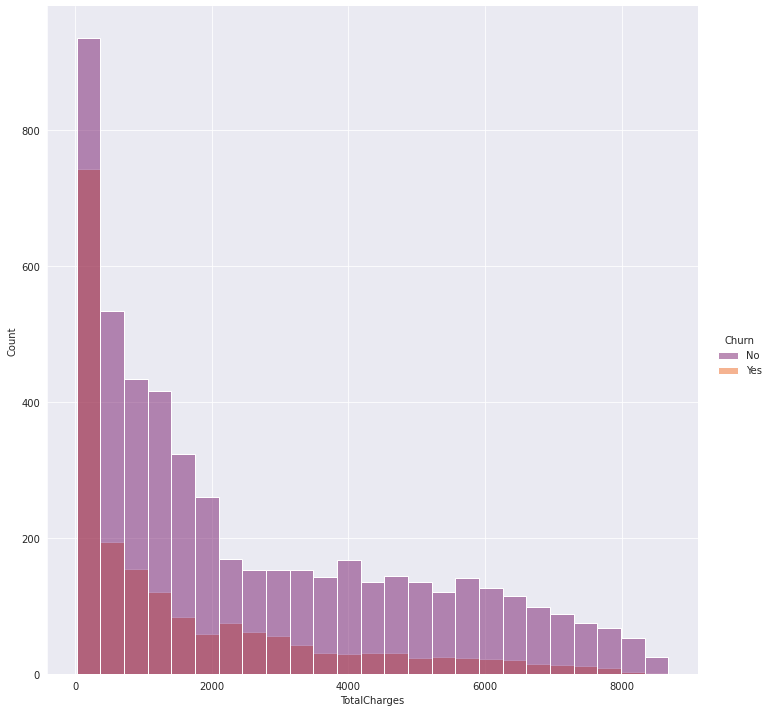

In [ ]:
sns.displot(x='TotalCharges',data=data, hue='Churn', palette='inferno', aspect=1, height=10)

# INSIGHTS

From our investigation above, we can conclude that tenure, payment method,tech support,contract,device protection, monthly charges,online backup, online security and internet service all contribute to the reason why customers leave the company.

Customers that did not use the services(device protection,tech support,online security and online backup) would most likely churn.This could be as a result of dissatisfaction after subscribing for packages which did not include all of the above services or customers were not aware of other packages which would include all of these services or the other packages were too expensive to afford. This could have contributed to why customers are leaving the company. 

A very large number of customers that used Electronic check for payment left the company. This  could be linked to several other factors. This should be further investigated.

From our visualization, we can see that the rate at which customers  churned for the first 6 month is very high. There is a possibility that customers pay more for the services offered by Telco compared to what they pay previously. We need to investigate further why new customers tend to leave the company after their first few months.

Customers using the Fibre optic are very likely to churn from the company this could be as a result of dissatisfaction, price or other companies offer the same services at a cheaper rate (competition). 

Customers who subscribed monthly also churned the most, probably because other companies had a lot more to offer at a reduced rate.It can be said that new customers are not loyal to the company.

There is a possibility that the high number of customers that churned after their first few months could be related to the internet service used, payment method, services subscribed for and those not subscribed for and the charges the customers paid monthly. 



# Possible Solution

Telco should focus on providing services that would make recent customers loyal. New customers should be made aware of the several internet services available and the packages that comes with each.

Customers should also be informed on the several service options available, this would help them to be better informed and select services that would give them more satisfaction. This would help reduce the number of customers leaving the company.

 The company should also investigate why most customers that use fibre optic churned, if this is as a result of competition from other companies then packages can be introduced to new customers which would help keep them.These packages can also be subsidized for recent customers.